#1.Business problem 

#2.Data collection

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
df= pd.read_csv("NB_Car_Ad.csv")

In [5]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [6]:
df.shape

(400, 5)

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
df.duplicated().sum()

0

In [17]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#3. Exploratory Data Analysis (EDA):

In [25]:
df.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
289,15713912,Female,37,78000,1
41,15591915,Female,33,51000,0
211,15735878,Male,52,150000,1
80,15595917,Male,30,80000,0


In [33]:
df=df.drop(columns=['User ID'])

KeyError: "['User ID'] not found in axis"

In [ ]:
df.sample(3)

In [ ]:
sns.scatterplot(df,x='EstimatedSalary',y='Age',hue='Gender')

In [ ]:
sns.scatterplot(df,x='EstimatedSalary',y='Age',hue='Purchased')

In [ ]:
df.info()

In [ ]:
# outlyer diection in given system and working 

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
sns.boxplot(df['EstimatedSalary'])

In [ ]:
sns.boxplot(df['Purchased'])

In [40]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: >

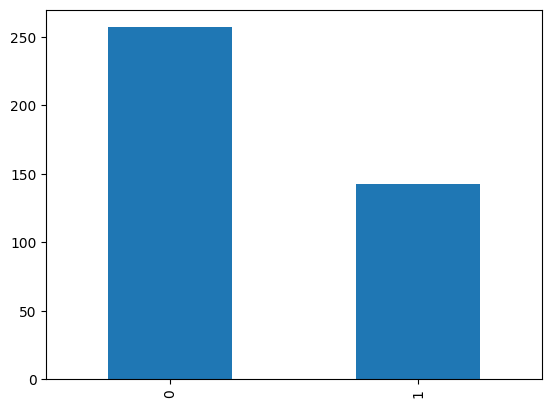

In [42]:
df['Purchased'].value_counts().plot(kind="bar")

#data preprcossing

In [45]:
#ordinal encoder 
from sklearn.preprocessing import LabelEncoder 


In [47]:
ord=LabelEncoder()
df['Gender']=ord.fit_transform(df['Gender'])

In [49]:
df.sample(3)

,Gender,Age,EstimatedSalary,Purchased
52,0,29,83000,0
325,0,41,60000,0
43,1,30,15000,0


In [51]:
# scaler producting in data 
from sklearn.preprocessing import MinMaxScaler 

In [53]:
min=MinMaxScaler()

In [55]:
df['EstimatedSalary']=min.fit_transform(df[['EstimatedSalary']])

In [57]:
df['Age']=min.fit_transform(df[['Age']])

In [59]:
df.head(4)

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0


In [61]:
df.sample(3)

,Gender,Age,EstimatedSalary,Purchased
181,0,0.309524,0.414815,0
387,1,0.500000,0.414815,0
124,0,0.547619,0.266667,0


#Model spliting

In [73]:
X=df.iloc[:,:-1]
y=df['Purchased'].values

In [75]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

#model traing

In [78]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB 

In [80]:
clf1 =MultinomialNB()
clf2=BernoulliNB()

In [82]:
clf1.fit(X_train,y_train)

MultinomialNB()

In [44]:
clf2.fit(X_train,y_train)

BernoulliNB()

In [47]:
y_pre1=clf1.predict(X_test)
y_pre2=clf2.predict(X_test)

# accuracy

In [48]:
from sklearn.metrics import accuracy_score,f1_score 
accuracy_score(y_test,y_pre1)

0.65

In [49]:
accuracy_score(y_test,y_pre2)

0.65

In [50]:
from sklearn.ensemble import RandomForestClassifier 
clf3=RandomForestClassifier()

In [51]:
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pre3=clf3.predict(X_test)
accuracy_score(y_test,y_pre3)

0.9125

In [54]:
from xgboost import XGBClassifier

In [55]:
clf4=XGBClassifier()

In [56]:
clf4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pre4=clf4.predict(X_test)
accuracy_score(y_test,y_pre4)

0.875

In [62]:
X_train=X_train.iloc[:,1:]

In [64]:
X_test=X_test.iloc[:,1:]

In [65]:
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pre3=clf3.predict(X_test)
accuracy_score(y_test,y_pre3)

0.9125

In [67]:
clf4=XGBClassifier()
clf4.fit(X_train,y_train)
y_pre4=clf4.predict(X_test)
accuracy_score(y_test,y_pre4)

0.9

# conclusion